In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
import plotly.express as px
import nbformat

import os

works_path = '../Clean_Data/cleaned_goodreads_works.csv'
reviews_path = '../Clean_Data/cleaned_goodreads_reviews.csv'

if not os.path.exists(works_path):
	print(f"File not found: {works_path}")
else:
	works = pd.read_csv(works_path)  # Load the cleaned data

if not os.path.exists(reviews_path):
	print(f"File not found: {reviews_path}")
else:
	reviews = pd.read_csv(reviews_path)  # Load the cleaned reviews data

# Display the first few rows of the works DataFrame
display(works.head())
# Display the first few rows of the reviews DataFrame
display(reviews.head())




,work_id,isbn,isbn13,original_title,author,original_publication_year,num_pages,description,genres,image_url,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating,similar_books
0,2288775,1579126294,9.781579e+12,A Murder is Announced,Agatha Christie,1950.0,288.0,Villagers expect a fun game after a Gazette an...,"mystery, thriller, crime, fiction, history, hi...",https://s.gr-assets.com/assets/nophoto/book/11...,49665,1281,8968,13357,7822,987,132,31266,4.0,341789
1,1602338,039333807X,9.780393e+12,Survivor,Chuck Palahniuk,1999.0,289.0,"""A wild amphetamine ride through the vagaries ...","fiction, mystery, thriller, crime, history, hi...",https://s.gr-assets.com/assets/nophoto/book/11...,129309,3145,27301,35312,21119,4816,923,89471,3.9,"2037794, 2667475, 93582"
2,901952,0385732538,9.780386e+12,Messenger,Lois Lowry,2004.0,169.0,Messengeris the masterful third novel in the G...,"young-adult, fiction, fantasy, paranormal, chi...",https://s.gr-assets.com/assets/nophoto/book/11...,173109,6863,25772,36621,23380,4595,752,91120,3.9,"1234050, 25125386, 25576, 39678, 2501288, 1220..."
3,24152432,1455525839,9.781456e+12,White Fire,Douglas Preston,2013.0,368.0,Special Agent Pendergast arrives at an exclusi...,"mystery, thriller, crime, fiction, history, hi...",https://s.gr-assets.com/assets/nophoto/book/11...,28724,1828,5713,6946,3065,534,122,16380,4.1,21856179
4,1041558,0312353766,9.780312e+12,The Red Tent,Anita Diamant,1997.0,336.0,"Her name is Dinah. In the Bible, her life is o...","fiction, history, historical fiction, biograph...",https://s.gr-assets.com/assets/nophoto/book/11...,613288,17408,208245,147492,68381,19757,9547,453422,4.2,"3303291, 2643796, 859342, 15868401, 2060095, 7..."


,review_id,user_id,work_id,started_at,read_at,date_added,rating,review_text,n_votes,n_comments
0,bd1c54fef76398bec195c9de3a0ffab7,792500e85277fa7ada535de23e7eb4c3,21460517,2016-01-01 00:00:00.000,2016-01-01 00:00:00.000,2015-12-31 00:00:00.000,3.0,"This was a quick, easy read that didn't excel ...",0,0
1,bf161e06d24a2ab2b10f738c5f6b540b,8c54eb29cfe45f819e6f9382cdf51d72,44058496,2016-01-01 00:00:00.000,2016-01-08 00:00:00.000,2016-01-01 00:00:00.000,3.0,I didn't find it as gripping as book 1 but sti...,0,0
2,dbebe525b57fa507983dfeab0738c9fa,1765bcc8fac303e5e41f7e353b06eaa3,13292985,2016-01-01 00:00:00.000,2016-11-18 00:00:00.000,2015-10-30 00:00:00.000,3.0,"I did enjoy this, but it wasn't as gripping as...",0,0
3,5efc962ba8fb22610d1ae3caf768d409,0ec1f05faf6e7717ee92f2d24b6367af,1267673,2016-01-01 00:00:00.000,2016-01-09 00:00:00.000,2016-01-01 00:00:00.000,3.0,The book is not at all subtle as it goes about...,0,0
4,3e048a2bb64b3383e9345a6c19937eec,cd0bc11efafa1539b19bc4e8750f2489,11738454,2016-01-01 00:00:00.000,2016-01-01 00:00:00.000,2015-12-31 00:00:00.000,3.0,There are things that I thought worked and did...,0,0


In [10]:
%pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


In [20]:
#descriptive statistics for works
print(works.describe())
print(works['genres'].value_counts().head(10))  # Most common genres




            work_id        isbn13  original_publication_year    num_pages  \
count  8.875000e+03  8.875000e+03                8875.000000  8875.000000   
mean   1.695933e+07  9.778714e+12                2004.691268   349.024113   
std    1.483220e+07  1.389017e+11                  39.322362   134.821572   
min    1.140000e+02  9.789381e+10                -430.000000     4.000000   
25%    3.031048e+06  9.780346e+12                2007.000000   283.000000   
50%    1.509372e+07  9.780554e+12                2011.000000   341.000000   
75%    2.478126e+07  9.781420e+12                2014.000000   400.000000   
max    5.168190e+07  9.789994e+12                2018.000000  2201.000000   

       reviews_count  text_reviews_count  5_star_ratings  4_star_ratings  \
count   8.875000e+03         8875.000000    8.875000e+03    8.875000e+03   
mean    7.612986e+04         2494.803606    1.834460e+04    1.516841e+04   
std     2.397892e+05         6401.638042    8.516088e+04    5.385697e+04   
mi

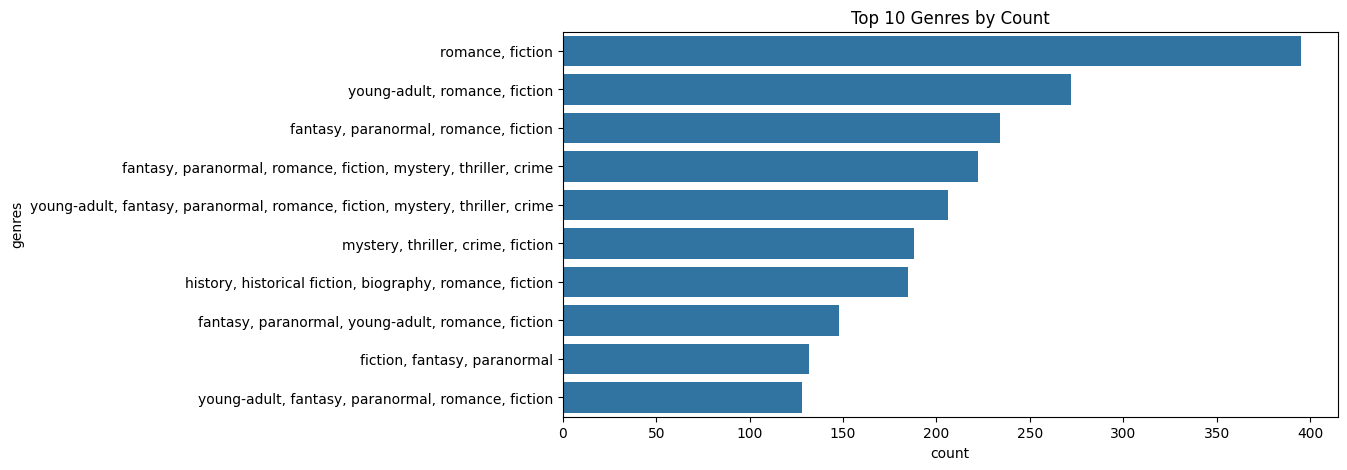

In [21]:

# Visualize the distribution of average ratings
plt.figure(figsize=(10, 5))
sns.countplot(y='genres', data=works, order=works['genres'].value_counts().index[:10])
plt.title('Top 10 Genres by Count')
plt.show()



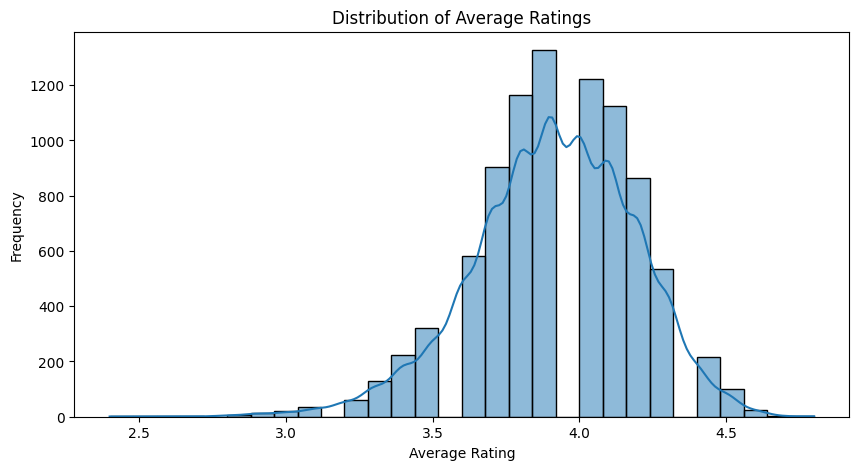

In [11]:
# Visualize the distribution of average ratings
plt.figure(figsize=(10, 5))
sns.histplot(works['avg_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [19]:
works['pub_year'] = pd.to_datetime(works['original_publication_year'], errors='coerce').dt.year

reviews['sentiment'] = reviews['review_text'].apply(lambda x: TextBlob(str(x)).polarity)

In [27]:
# Recommend top-rated books in a favorite genre
def recommend_books(genre, n=5):
    subset = works[works['genres'].str.contains(genre, case = False, na=False)]
    top_books = subset.sort_values('avg_rating', ascending=False).head(n)
    return top_books[['original_title', 'author', 'avg_rating', 'pub_year']]

print("Recommended Fantasy Books:")
display(recommend_books('fantasy', 5))

Recommended Fantasy Books:


,original_title,author,avg_rating,pub_year
3934,"The Way of Kings, Part 2",Brandon Sanderson,4.8,1970
6257,Words of Radiance,Brandon Sanderson,4.8,1970
1676,Oathbringer,Brandon Sanderson,4.7,1970
6261,Saga: Book One,Brian K. Vaughan,4.7,1970
7626,Exile,Shannon Messenger,4.6,1970


In [31]:
#Example: Show top reviews for a recommended book

book_id = works[works['original_title'] == 'king'].iloc[0]['work_id']  # Replace 'Dune' with any title\n",
top_reviews = reviews[reviews['work_id'] == book_id].head(3)
display(top_reviews[['review_text']])

IndexError: single positional indexer is out-of-bounds

In [2]:
%pip install --quiet "nbformat>=4.2.0"

fig = px.histogram(works, x='avg_rating', nbins=30, title='Average Ratings Distribution')
fig.show()



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
